In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from scipy import stats as st

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
#задание 1
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
#задание 2
data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [5]:
data[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


<AxesSubplot:>

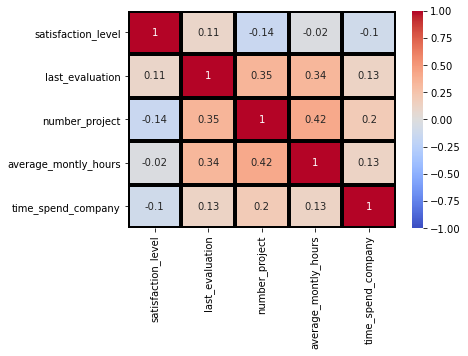

In [13]:
#задание 3
corr = data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
#самые скоррелированные 'average_montly_hours' и 'number_project'
#наименее скоррелированные 'average_montly_hours' и 'satisfaction_level'

In [16]:
#задание 4
data[['satisfaction_level', 'department']].groupby(['department']).count().rename(columns={'satisfaction_level': 'number_of_employees'})
# не использовал value_counts чтоб таблица была симпотичнее

,number_of_employees
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


<AxesSubplot:>

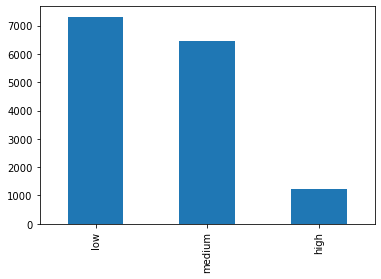

In [17]:
#задание 5
data['salary'].value_counts().plot(kind='bar')

In [24]:
#задание 6
emp_sel_data = data[['salary', 'department', 'satisfaction_level']].groupby(['salary', 'department'], as_index=False).count().rename(columns={'satisfaction_level': 'number_of_employees'})
emp_sel_data

,salary,department,number_of_employees
0,high,IT,83
1,high,RandD,51
2,high,accounting,74
3,high,hr,45
4,high,management,225
5,high,marketing,80
6,high,product_mng,68
7,high,sales,269
8,high,support,141
9,high,technical,201


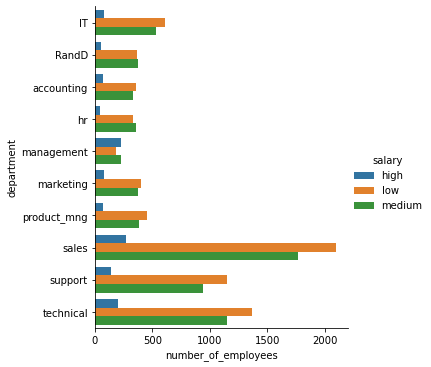

In [26]:
sns.catplot(y='department', x='number_of_employees', hue='salary', kind='bar', data=emp_sel_data)

In [9]:
#задание 7
#H0: среднее время проведенное на работе у сотрудников с низким и высоким окладом одинаковое
#H1: среднее время проведенное на работе у сотрудников с низким и высоким окладом разное

data_h = data[data.salary == 'high']
data_l = data[data.salary == 'low']

result = st.ttest_ind(data_h['average_montly_hours'], data_l['average_montly_hours'], equal_var=False)
print(result)

if (result.pvalue < 0.05):
    print('Отвергаем нулевую гипотезу, среднее время проведенное на работе у сотрудников с низким и высоким окладом разное')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


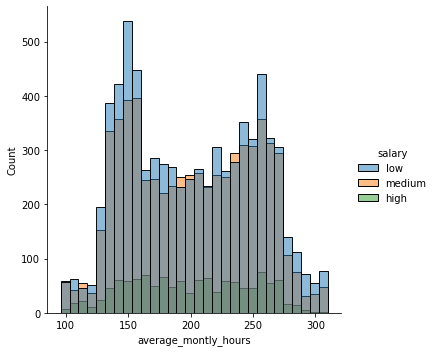

In [13]:
sns.displot(data, x="average_montly_hours", hue="salary")

In [22]:
#задание 8
#для уволившихся

print('Доля сотрудников с повышением за последние 5 лет:', len(data[(data.left == 1) & (data.promotion_last_5years == 1)])/len(data[data.left == 1]))
print('Средняя степень удовлетворенности:', data[data.left == 1].satisfaction_level.mean())
print('Среднее количество проектов:', data[data.left == 1].number_project.mean())

Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.44009801176140917
Среднее количество проектов: 3.8555026603192384


In [23]:
#для не уволившихся

print('Доля сотрудников с повышением за последние 5 лет:', len(data[(data.left == 0) & (data.promotion_last_5years == 1)])/len(data[data.left == 0]))
print('Средняя степень удовлетворенности:', data[data.left == 0].satisfaction_level.mean())
print('Среднее количество проектов:', data[data.left == 0].number_project.mean())

Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479516
Среднее количество проектов: 3.786664333216661


In [5]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
#задание 9

# нормируем данные

data_norm = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']]
ss = StandardScaler()
data_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = scaler.fit_transform(data_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])
data_norm

<ipython-input-23-aec60cdb1665>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] = scaler.fit_transform(data_norm[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])
C:\Users\ros\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1
...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, data_norm.left, test_size=0.25)

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
accuracy_score(y_test, lda.predict(X_test))
# правильнее было использовать LR тест тк есть категориальные данные

0.7616